In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
%matplotlib inline
import os
from os import listdir

In [2]:
import PIL
PIL.__version__

'8.3.1'

In [3]:
import time, cv2

# Classification des bien de consommations

In [4]:
path = "Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [5]:
list_photos

['009099b1f6e1e8f893ec29a7023153c4.jpg',
 '0096e89cc25a8b96fb9808716406fe94.jpg',
 '00cbbc837d340fa163d11e169fbdb952.jpg',
 '00d84a518e0550612fcfcba3b02b6255.jpg',
 '00e966a5049a262cfc72e6bbf68b80e7.jpg',
 '00ed03657cedbe4663eff2d7fa702a33.jpg',
 '01089dc3618a0ab7304d784ef400b83d.jpg',
 '0131e5d87b72877702d536299cf83b75.jpg',
 '020d2daba55a723128e4e07c0b0393a9.jpg',
 '02127f52e96fb72c66bf081d25104ef8.jpg',
 '025a85a3d1cddc6307f7dc075d8d2132.jpg',
 '02a53d335775b652f22f41b529b9d646.jpg',
 '02c63a087b298ec74042d557acf61be1.jpg',
 '031c98cfde349d99fb6d5983f54c8751.jpg',
 '032e812adcd11a38fd8b764891a852ff.jpg',
 '037b39bef3db7ccd264c577a0edf0c0a.jpg',
 '037c2402fee39fbc80433935711d1383.jpg',
 '04f9f818e2d657b873b07578cfe2eade.jpg',
 '04f9ff160a1561e3656350f4bd6b8c50.jpg',
 '050ea3acb555bf641e7ae9b4f3ba684a.jpg',
 '052559ede419996737893eb47568ee7f.jpg',
 '057836ecde71565f8ebdd576e41fdc96.jpg',
 '059493eeb88ebb4cc08d1522f3f87c3f.jpg',
 '059bc43e03e1824a9ab6466e32e5f137.jpg',
 '06749cbff1487f

In [6]:
im = pd.read_csv('im1.csv')

In [7]:
im.head(1)

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,...,description,product_rating,overall_rating,brand,product_specifications,target,description_cleaned,word_count,description_cleaned_bis,description_cleaned_lem
0,0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,...,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",HomeFurnishing,key featur eleg polyest multicolor abstract ey...,162,key eleg polyest multicolor abstract eyelet do...,key elegance polyester multicolor abstract eye...


In [8]:
im['target'].unique()

array(['HomeFurnishing', 'BabyCare', 'Watches', 'HomeDecorFestiveNeeds',
       'KitchenDining', 'BeautyandPersonalCare', 'Computers'],
      dtype=object)

## Création des labels des photos à partir du nom des images

In [9]:
dic= {'HomeFurnishing':0, 'KitchenDining':1, 'HomeDecorFestiveNeeds':2, 'Computers':3, 'Watches':4, 'BeautyandPersonalCare':5, 'BabyCare':6 }
data = pd.DataFrame()
data["image_path"] = im['image']
data["target_name"] = im["target"]
data["target"] = im['target'].map(dic)
data

,image_path,target_name,target
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,HomeFurnishing,0
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,BabyCare,6
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,BabyCare,6
3,d4684dcdc759dd9cdf41504698d737d8.jpg,HomeFurnishing,0
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,HomeFurnishing,0
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,BabyCare,6
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,BabyCare,6
1047,5912e037d12774bb73a2048f35a00009.jpg,BabyCare,6
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,BabyCare,6


In [10]:
data.groupby("target_name").count()

,image_path,target
target_name,,
BabyCare,150,150
BeautyandPersonalCare,150,150
Computers,150,150
HomeDecorFestiveNeeds,150,150
HomeFurnishing,150,150
KitchenDining,150,150
Watches,150,150


## Affichage d'exemples d'images par label

HomeFurnishing


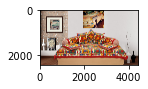

BabyCare


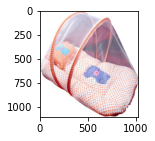

Watches


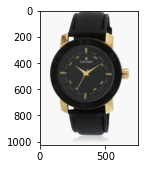

HomeDecorFestiveNeeds


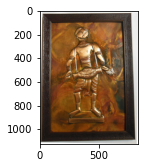

KitchenDining


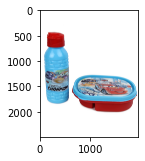

BeautyandPersonalCare


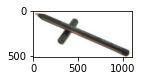

Computers


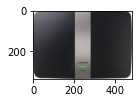

In [11]:
from matplotlib.image import imread
list_labels = ['HomeFurnishing', 'BabyCare', 'Watches', 'HomeDecorFestiveNeeds',
       'KitchenDining', 'BeautyandPersonalCare', 'Computers']

def list_fct(name) :
    list_image_name = [data['image_path'][i] for i in range(len(data)) if data["target_name"][i]==name]
    return list_image_name

list_BabyCare=[data['image_path'][i] for i in range(len(data)) if data["target_name"][i]=="BabyCare"]
list_BeautyandPersonalCare=[data['image_path'][i] for i in range(len(data)) if data["target_name"][i]=="BeautyandPersonalCare"]
list_Computers=[data['image_path'][i] for i in range(len(data)) if data["target_name"][i]=="Computers"]
list_HomeDecorFestiveNeeds=[data['image_path'][i] for i in range(len(data)) if data["target_name"][i]=="HomeDecorFestiveNeeds"]
list_HomeFurnishing=[data['image_path'][i] for i in range(len(data)) if data["target_name"][i]=="HomeFurnishing"]
list_KitchenDining=[data['image_path'][i] for i in range(len(data)) if data["target_name"][i]=="KitchenDining"]
list_Watches=[data['image_path'][i] for i in range(len(data)) if data["target_name"][i]=="Watches"]

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(1):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [12]:
list_fct('BabyCare')

['7b72c92c2f6c40268628ec5f14c6d590.jpg',
 '64d5d4a258243731dc7bbb1eef49ad74.jpg',
 '90e56526f4c5892beac49f262b85150a.jpg',
 '5325213d84c80ad310b6e4b37a1ac824.jpg',
 'f4e7f269319ba9cf5507a9e2febacbf5.jpg',
 '903d63e2b71d692ccd628e1de516516e.jpg',
 '141d2b743c477043041faddf9233c8ad.jpg',
 '7a3f11f380a1bf85338ab3771ff81e9f.jpg',
 'ae45b64d808a883aa35f2bf4de879cac.jpg',
 '320833ab08c9a94ef83520612899a85f.jpg',
 '601817defaff9d0e30e1b72f96d3975f.jpg',
 '3cdfd9df09f61a8fd178bafcc8dbed31.jpg',
 '184ecf07ca4e2872eaf53d2344a1e783.jpg',
 'f1ee63a5f0db853e2c1b377778580d39.jpg',
 '8015db34d09642b046c775e8157dd729.jpg',
 'bc784846bd59a16832454416ac708003.jpg',
 'be09f5a3a88ac10ae14c791fc8ac0dae.jpg',
 '7dd5e83e2108a97659577e50879f9d9f.jpg',
 '70578f48cc96bbb60d040e08025e521d.jpg',
 '32cf0691248297655e2c1728b12e2262.jpg',
 '719677b02bfccafb86e9be78f36f938b.jpg',
 'a8ea6fc2b3cd95f46bced80853ce8e0e.jpg',
 '7f7c64d439d64656d6baa40f5798cdf5.jpg',
 '8876d7569efdaff5a21b33a1ab44a13d.jpg',
 '7c15895bbfd7da

## Determination et affichage des descripteur SWIFT

In [13]:
from PIL import Image
# Importer l’image
image = Image.open('Images/154920adb9d584b55d419227f9b01cc6.jpg')
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1100x1033 at 0x204F3197748>


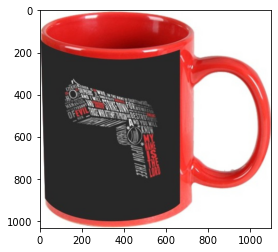

In [14]:
plt.imshow(image)

In [15]:
print( "Le format de l'image :", image.format )
print( "Le mode de l'image:", image.mode )
print( "La taille de l'image:", image.size )
print( "Largeur : {} pixel, hauteur : {} pixel".format( image.width, image.height) )

Le format de l'image : JPEG
Le mode de l'image: RGB
La taille de l'image: (1100, 1033)
Largeur : 1100 pixel, hauteur : 1033 pixel


In [16]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [17]:
# Créer une copie de l’image
img = image.copy()

In [18]:
type(img)

PIL.Image.Image

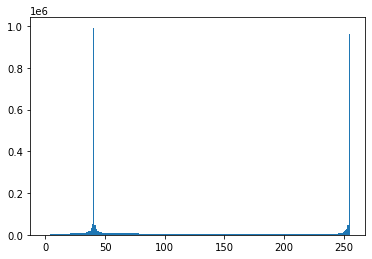

In [19]:
img = np.array(image)
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

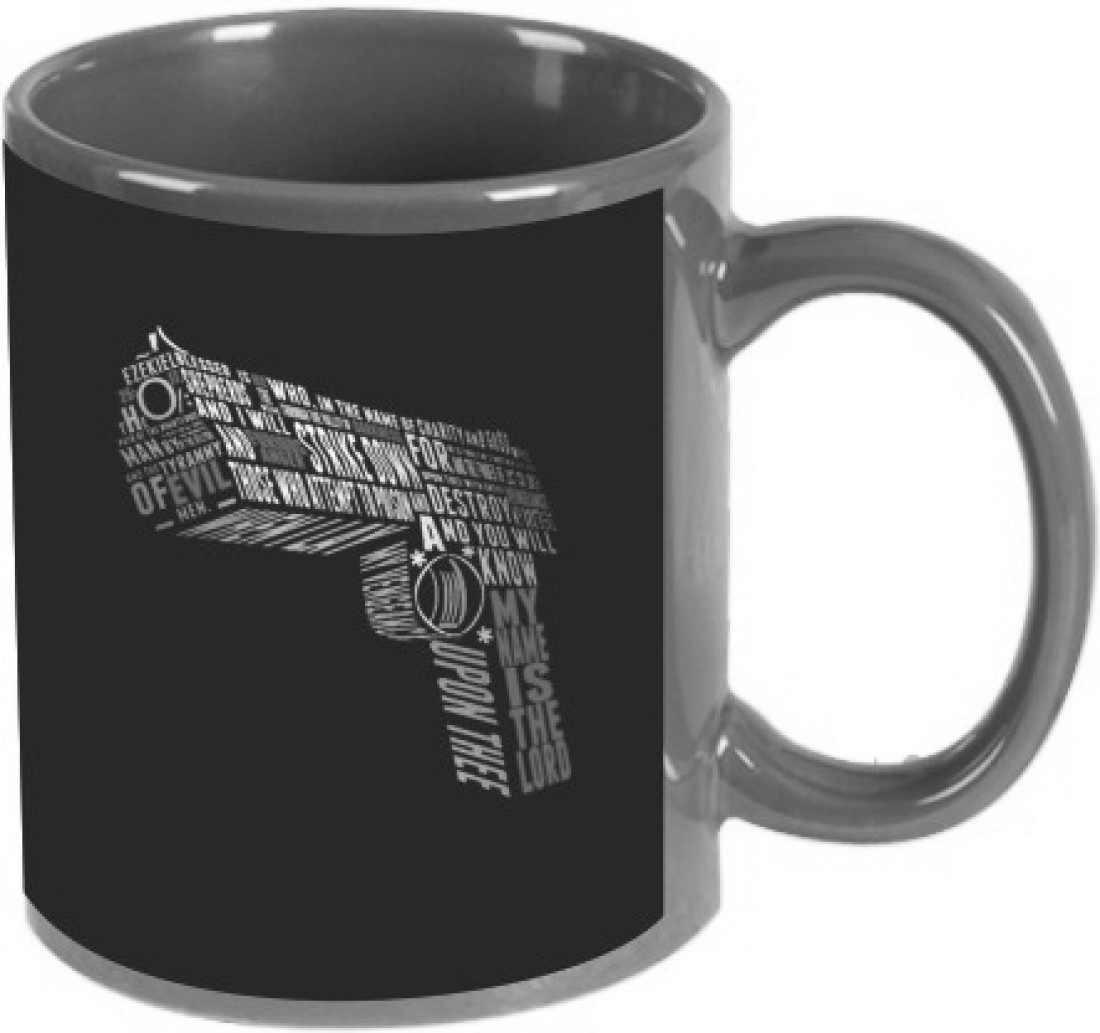

In [20]:
image_grey = image.convert('L')
image_grey

L'égalisation d'histogrammes est une technique simple permettant de réajuster le contraste d'une image et ainsi de lui redonner du peps ou de l'adoucir. Pour comprendre de manière intuitive le fonctionnement de ce traitement, étudions l'allure de l'histogramme pour des images peu ou trop contrastées

In [21]:
image_grey = np.array(image_grey)
image_grey_egali = cv2.equalizeHist(image_grey)

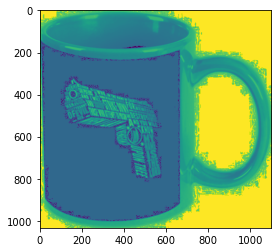

In [25]:
plt.imshow(image_grey_egali)

In [27]:
sift = cv2.xfeatures2d.SIFT_create()

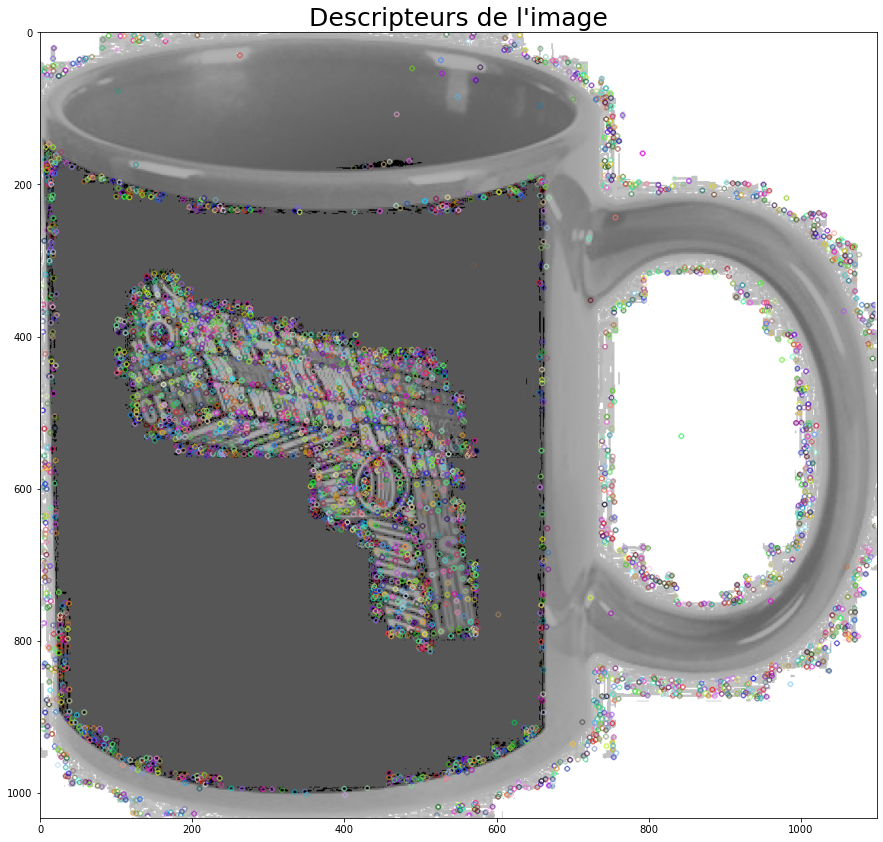

Descripteurs :  (4594, 128)

[[  0.   1.  15. ...   0.   0.   0.]
 [ 25.  34.  20. ...   8.  21.   2.]
 [  0.   0.   0. ...  43.   1.   9.]
 ...
 [  5.  74.  31. ...   0.   0.   0.]
 [  0.   0.   0. ... 121.   4.   5.]
 [  2.   0.   0. ...   0.   0.   0.]]


In [31]:
kp, des = sift.detectAndCompute(image_grey_egali, None)
img_des=cv2.drawKeypoints(image_grey_egali,kp,image_grey_egali)
plt.figure(figsize=(15,15))
plt.title('Descripteurs de l\'image', fontsize= 25)
plt.imshow(img_des)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [26]:

sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    
    if image_num%100 == 0 : print(image_num)
    
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    
    
    res = cv2.equalizeHist(image_grey)
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (525000, 128)
temps de traitement SIFT descriptor :          2565.62 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [27]:
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  725
Création de 725 clusters de descripteurs ...
temps de traitement kmeans :             7.05 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [28]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             3.00 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images 

In [29]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(im_features)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["target_name"]
print(df_tsne.shape)

(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images


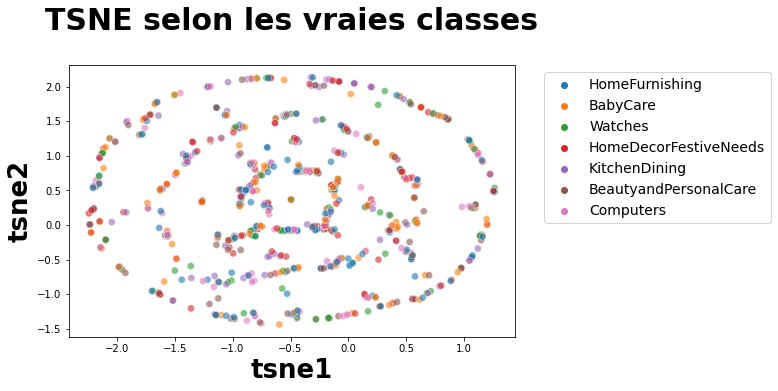

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
       palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='best', prop={'size': 14}) 

plt.show()


Les classes ne se différencient pas bien du tout

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [31]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI reste faible

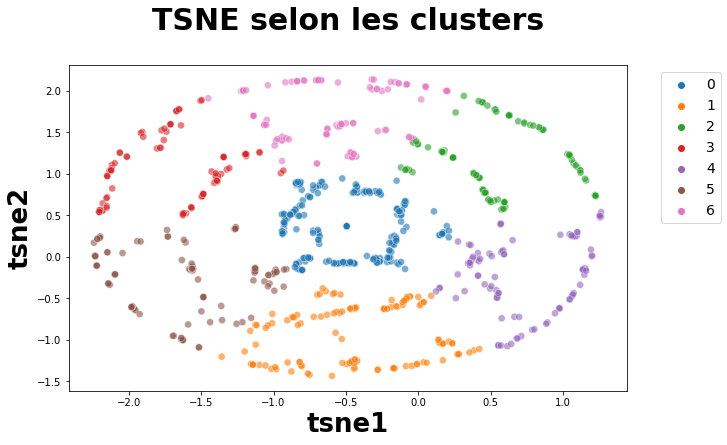

ARI :  0.000727413771159203


In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='best',prop={'size': 14}) 

plt.show()

labels = data["target"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# 